In [37]:
import numpy as np
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch

In [38]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [39]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [40]:
frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])

### Partidas Disponíveis

In [41]:
matches_df = df[['match_id', 'team']].drop_duplicates()
matches_summary = matches_df.groupby('match_id')['team'].unique().reset_index()
matches_summary

,match_id,team
0,3895052,"[RB Leipzig, Bayer Leverkusen]"
1,3895060,"[Borussia Mönchengladbach, Bayer Leverkusen]"
2,3895067,"[Darmstadt 98, Bayer Leverkusen]"
3,3895074,"[Bayer Leverkusen, Bayern Munich]"
4,3895086,"[FC Heidenheim, Bayer Leverkusen]"
5,3895095,"[Bayer Leverkusen, FSV Mainz 05]"
6,3895107,"[FC Köln, Bayer Leverkusen]"
7,3895113,"[Bayer Leverkusen, Wolfsburg]"
8,3895121,"[Bayer Leverkusen, Freiburg]"
9,3895134,"[Hoffenheim, Bayer Leverkusen]"


In [42]:
df = df[df['match_id'] == 3895302] # Match ID para Bayer Leverkusen vs Werder Bremen

### Jogador: Florian Wirtz (Bayer Leverkusen) vs Werder Bremen

Análise de passes:

In [43]:
passes = df[
    (df['type'] == 'Pass') &
    (df['team'] == 'Bayer Leverkusen') &
    (df['player'] == 'Florian Wirtz') &
    (df['pass_outcome'].isnull())
].copy()

In [44]:
passes[['x', 'y']] = passes['location_x'].apply(pd.Series)
passes[['end_x', 'end_y']] = passes['pass_end_location'].apply(pd.Series)

In [45]:
# Distancia dos Passes:
passes['distance'] = np.sqrt((passes['end_x'] - passes['x'])**2 + (passes['end_y'] - passes['y'])**2)
passes['progressive'] = passes['end_x'] > passes['x']

Total de passes certos do Wirtz: 424
Média de distância dos passes: 21.34 metros
Percentual de passes progressivos: 48.3%


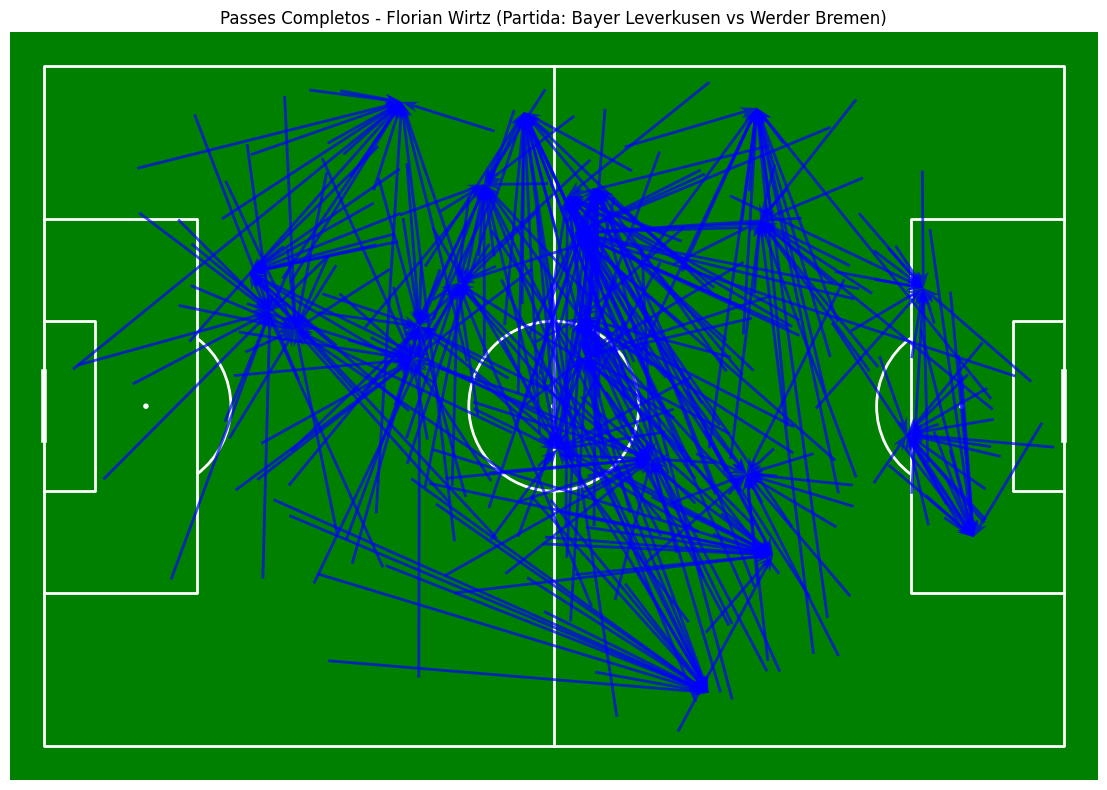

In [46]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
pitch.arrows(
    passes['x'], passes['y'],
    passes['end_x'], passes['end_y'],
    ax=ax, color='blue', width=2, headwidth=4, headlength=6, alpha=0.7
)

ax.set_title('Passes Completos - Florian Wirtz (Partida: Bayer Leverkusen vs Werder Bremen)', fontsize=12)

# Exibir algumas estatísticas no console
print(f'Total de passes certos do Wirtz: {len(passes)}')
print(f'Média de distância dos passes: {passes["distance"].mean():.2f} metros')
print(f'Percentual de passes progressivos: {passes["progressive"].mean()*100:.1f}%')

fig.tight_layout()

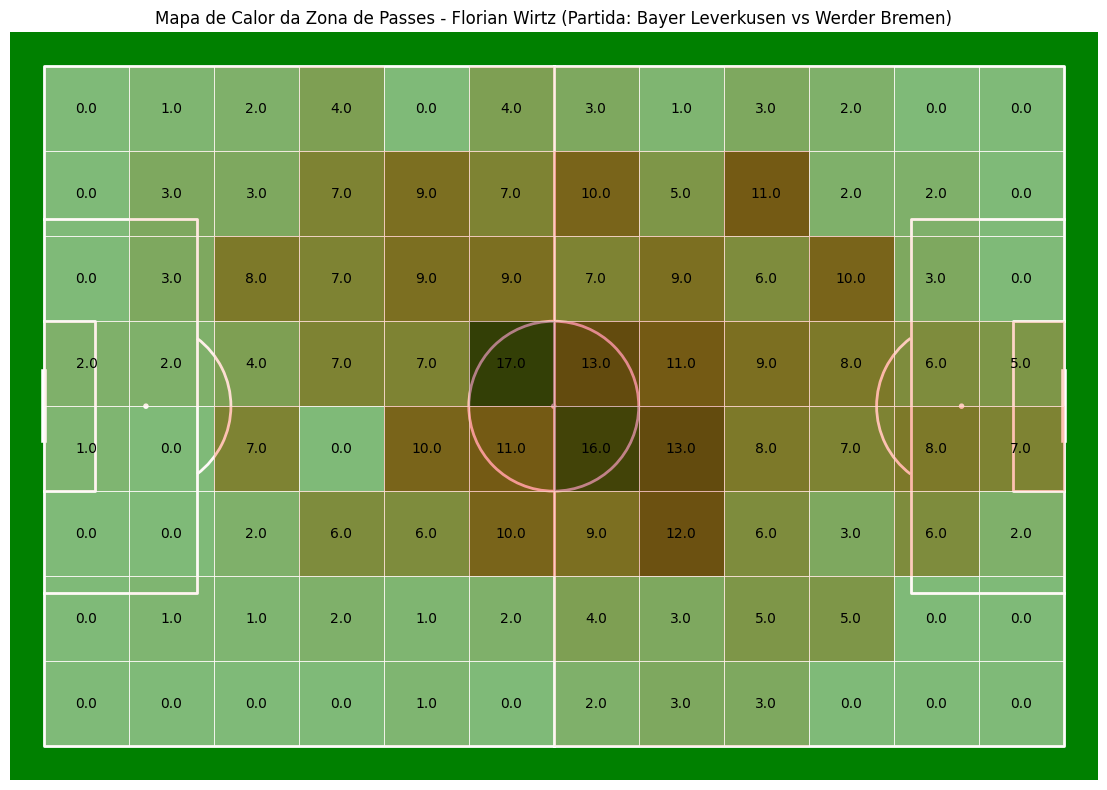

In [47]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))

bin_statistic = pitch.bin_statistic(passes['x'], passes['y'], statistic='count', bins=(12, 8))

pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', alpha=0.5, edgecolor='white', linewidth=0.5)

pitch.label_heatmap(bin_statistic, ax=ax, color='black', fontsize=10, ha='center')

ax.set_title('Mapa de Calor da Zona de Passes - Florian Wirtz (Partida: Bayer Leverkusen vs Werder Bremen)', fontsize=12)

fig.tight_layout()

### Passing Network

O **Passing Network** mostra:
- Cada jogador é representado por um círculo (posição média em campo).
- A espessura das linhas entre os jogadores representa o número de passes trocados entre eles.
- Mostra as conexões e o fluxo de jogo coletivo.

Muito usado por clubes e analistas para entender:
- Quem é o “hub” do time (quem mais distribui)
- Quem joga mais próximo de quem
- Se o time joga mais pela esquerda, direita, centro, etc.

In [14]:
passes = df[(df['type'] == 'Pass') &
    (df['team'] == 'Bayer Leverkusen') &
    (df['pass_outcome'].isnull())
].copy()

In [15]:
passes[['x', 'y']] = passes['location_x'].apply(pd.Series)

In [16]:
# 1️⃣ Posição média de cada jogador
player_positions = passes.groupby('player').agg({'x':'mean', 'y':'mean', 'id':'count'}).reset_index()
player_positions.rename(columns={'id': 'num_passes'}, inplace=True)

In [17]:
# 2️⃣ Conexões entre jogadores (matriz de passes)
pass_between = passes.groupby(['player', 'pass_recipient']).size().reset_index(name='pass_count')

In [30]:
# 3️⃣ Aplicar filtro de mínimo de passes para traçar conexão
MIN_PASSES = 5
pass_between_filtered = pass_between[pass_between['pass_count'] >= MIN_PASSES]

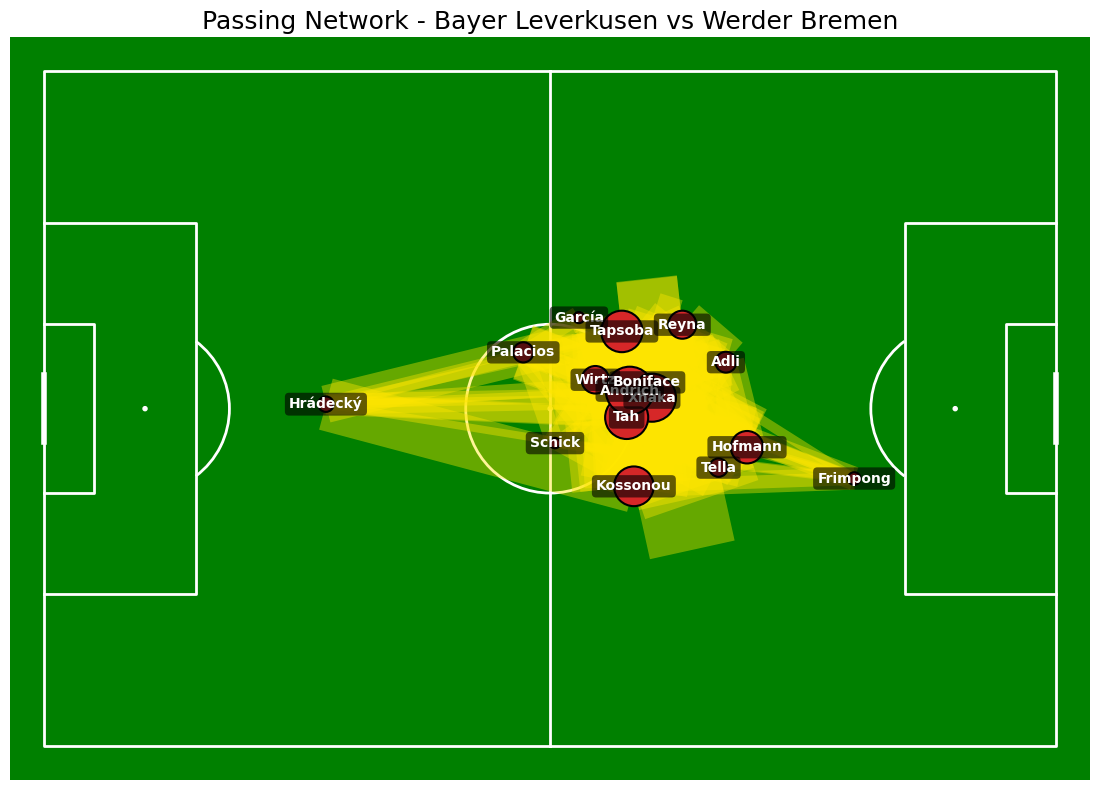

In [35]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))

# Desenhar conexões filtradas
for _, row in pass_between_filtered.iterrows():
    passer = row['player']
    recipient = row['pass_recipient']
    count = row['pass_count']
    
    passer_pos = player_positions[player_positions['player'] == passer]
    recipient_pos = player_positions[player_positions['player'] == recipient]
    
    if not passer_pos.empty and not recipient_pos.empty:
        x_start, y_start = passer_pos['x'].values[0], passer_pos['y'].values[0]
        x_end, y_end = recipient_pos['x'].values[0], recipient_pos['y'].values[0]
        
        pitch.lines(
            x_start, y_start, x_end, y_end,
            ax=ax, lw=count*0.5, color="#ffe600", alpha=0.4, zorder=1
        )

# Desenhar os jogadores com tamanho proporcional ao número de passes
max_passes = player_positions['num_passes'].max()
sizes = player_positions['num_passes'] / max_passes * 1200  # tamanho relativo

pitch.scatter(player_positions['x'], player_positions['y'], s=sizes,
              color='#d62728', edgecolors='black', linewidth=1.5, ax=ax, zorder=2)

# Adicionar os nomes dos jogadores
for idx, row in player_positions.iterrows():
    ax.text(row['x'], row['y'], row['player'].split()[-1], ha='center', va='center',
            fontsize=10, fontweight='bold', color='white', zorder=3,
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3'))

ax.set_title('Passing Network - Bayer Leverkusen vs Werder Bremen', fontsize=18)
fig.tight_layout()